In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

This is the solution to the [bagging exercise](https://github.com/codebasics/py/blob/master/ML/19_Bagging/bagging_exercise.md) from code basics.

In [2]:
df = pd.read_csv("data/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

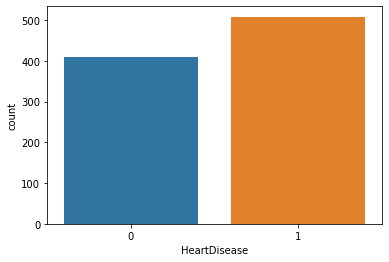

In [6]:
sns.countplot(x="HeartDisease", data=df)

# Data preprocessing

## Remove outliers

In [7]:
num_cols = ["RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

In [8]:
def remove_outliers_z_score(df, col, n):
    df["z_score"] = (df[col] - df[col].mean()) / df[col].std()
    return df[(df.z_score > -n) & (df.z_score < n)].drop("z_score", axis=1)

In [9]:
# We remove outliers using -3 < Z score < 3

for col in num_cols:
    df = remove_outliers_z_score(df, col, 3)

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Encode categorical variables

In [11]:
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

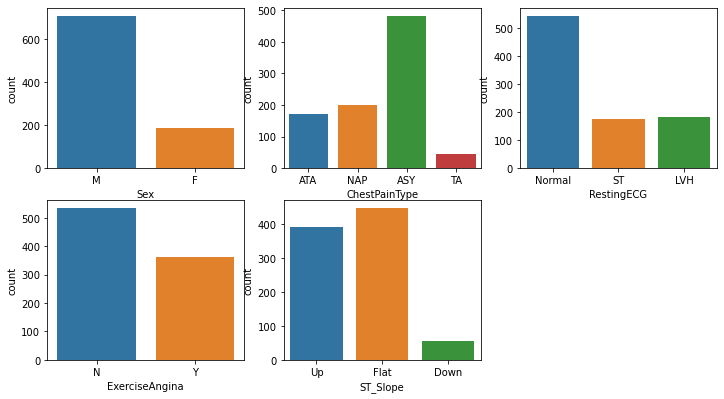

In [12]:
plt.figure(figsize=(12,10))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df)

In [13]:
X_num = df[num_cols]
X_cat = df[cat_cols]
y = df.HeartDisease

## Scale the features

In [14]:
sc = StandardScaler()

X_num = sc.fit_transform(X_num)

## Encode the categorical features

In [15]:
ohe = OneHotEncoder()
X_cat_encoded = ohe.fit_transform(X_cat).toarray()

In [16]:
cat_encoded_cols = ["cat_col_"+str(i) for i in range(X_cat_encoded.shape[1])]

X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=cat_encoded_cols)

In [17]:
X = np.hstack((X_num, X_cat_encoded))

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=20)

# Create a classification model

In [19]:
svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred = svm.predict(X_val)

In [22]:
accuracy_score(y_val, y_pred)

0.85

In [24]:
precision_score(y_val, y_pred)

0.8272727272727273

In [25]:
recall_score(y_val, y_pred)

0.9191919191919192

# Crossvalidation

In [27]:
scores = cross_val_score(SVC(), X, y, cv=5)
scores

array([0.85555556, 0.9       , 0.84444444, 0.83888889, 0.76536313])

In [28]:
np.mean(scores)

0.8408504034761017

# Bagging

In [30]:
bag_model = BaggingClassifier(base_estimator=SVC(), n_estimators=100, max_samples=0.8, random_state=20)

In [31]:
scores = cross_val_score(bag_model, X, y, cv=5)
np.mean(scores)

0.8419490999379267

In [32]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.824171322160149